In [53]:
from PIL import Image, ImageDraw, ImageFont  
import numpy as np
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from scipy import interpolate
import cv2 
from scipy.integrate import quad
from scipy.misc import derivative
import sympy as sp
import math
from math import sqrt, pi
# from scipy import integrate
from sympy import integrate, Symbol 
import scipy.integrate as spi

In [54]:
# Parameters
font_type = 'C:/Windows/Fonts/Calibri/calibrib.ttf'
font_size = 49 # 49
character = 'A'
threshold_binarisation = 100

In [55]:
# Befehl muss zweimal ausgeführt werden (komisch)
%matplotlib qt
%matplotlib qt

In [56]:
img = Image.new('RGB', (50, 50), color = (0, 0, 0))   # (50,50)  
fnt = ImageFont.truetype(font_type, font_size)
d = ImageDraw.Draw(img)
d.text((0,0), character, font=fnt, fill=(255, 255, 255))
# img.show() 
# img.save('pil_text_font.bmp')
img = np.array(img)
plt.figure('img')
plt.imshow(img)
x,y,z = np.shape(img)
print(x,y,z)
img[img<threshold_binarisation] = 0
plt.figure('asdfasdf')
plt.imshow(img/255)

50 50 3


In [57]:
# img.astype(np.float32)
# img.astype(np.uint8)
# get the bounding rect
img_rect = deepcopy(img)
x, y, w, h = cv2.boundingRect(img_rect[:,:,1])
# print(x, y, w, h)
x_min = x-1
y_min = y-1
x_max = x+w
y_max = y+h
cv2.rectangle(img_rect, (x_min, y_min), (x_max, y_max), (0, 255, 0), 0)   # img wird überschrieben
plt.figure('img_rect')
plt.imshow(img_rect/255)

In [58]:
img_without_boundary = img_rect[y:y_max, x:x_max,:]
plt.figure('img_without_boundary')
plt.imshow(img_without_boundary/255)

In [59]:
# print(img_without_boundary)
y_img_without_boundary, x_img_without_boundary, z_img_without_boundary = np.shape(img_without_boundary)
# print(y_img_without_boundary, x_img_without_boundary, z_img_without_boundary)

In [143]:
tmp_x_min = int(-1*x_img_without_boundary/2)
tmp_x_max = int(np.ceil(x_img_without_boundary/2))
tmp_y_min = int(-1*y_img_without_boundary/2)
tmp_y_max = int(np.ceil(y_img_without_boundary/2))
# print(tmp_x_min)
# print(tmp_x_max)
# print(tmp_y_min)
# print(tmp_y_max)
x_mesh = np.arange(tmp_x_min, tmp_x_max, 1)
y_mesh = np.arange(tmp_y_min, tmp_y_max, 1)
# print(x_mesh)
# print(y_mesh)
xx, yy = np.meshgrid(x_mesh, np.flip(y_mesh,0), sparse=True)
yy = yy*1j
z = (yy+xx)
# print(z)
q = np.pi/180
c_meshgrid = 0.5*z.imag*1j + 0.5*z.real+np.sin(z.real)  # (z*np.cos(q)-np.sin(q)) / (z*np.sin(q)+np.cos(q*5))
# print(c_meshgrid)
y_meshgrid, x_meshgrid = c_meshgrid.shape
# print(y_meshgrid, x_meshgrid)
# c_meshgrid_reshape = c_meshgrid.reshape((y_meshgrid,x_meshgrid,1))

In [144]:
c_meshgrid_mask = deepcopy(c_meshgrid)
max_real_meshgrid_mask = int(np.max(c_meshgrid_mask.real))
max_imag_meshgrid_mask = int(np.max(c_meshgrid_mask.imag))
min_real_meshgrid_mask = int(np.min(c_meshgrid_mask.real))
min_imag_meshgrid_mask = int(np.min(c_meshgrid_mask.imag))
# print(max_real_meshgrid_mask)
# print(max_imag_meshgrid_mask)
# print(min_real_meshgrid_mask)
# print(min_imag_meshgrid_mask)
# print(c_meshgrid_mask.shape)

In [145]:
z_transform = np.array(np.zeros((max_imag_meshgrid_mask+1-min_imag_meshgrid_mask, max_real_meshgrid_mask-min_real_meshgrid_mask+1, 3)))
y_z_transform, x_z_transform, z_z_transform = z_transform.shape
# print(z_transform)
# print(y_z_transform, x_z_transform, z_z_transform)

In [146]:
for i in range(y_meshgrid):
    for j in range(x_meshgrid):
        for k in range(3):
            z_transform[int(max_imag_meshgrid_mask-c_meshgrid_mask[i,j].imag), int(c_meshgrid_mask[i,j].real-min_real_meshgrid_mask),:] = img_without_boundary[i,j,k]
        
#   Für Y-Achse => max-y
#   Für X-Achse => x-min

In [147]:
print(z_transform.shape)
print(img_without_boundary.shape)

(15, 14, 3)
(31, 28, 3)


In [148]:
plt.figure('transformation')
plt.imshow(z_transform/255)

# Without complex numbers <br>

In [14]:
plt.figure('img_without_boundary')
plt.imshow(img_without_boundary/255)
y_img, x_img, z_img = img_without_boundary.shape
print(y_img, x_img, z_img)

31 28 3


In [15]:
# setting the x - coordinates 
x_plot = np.arange(-1*x_img/2, x_img/2 , 0.1) 
# print(x_plot)
# setting the corresponding y - coordinates 
# potting the points 
f_plot = x_plot
plt.figure('plot')
plt.plot(x_plot, f_plot)
plt.grid(True)
# function to show the plot 
plt.show() 

In [166]:
import scipy.integrate as integrate
x = sp.Symbol('x')  
f = x**2
# shift half pixel to the right 
f_derviate = sp.diff(f) 
print(type(f_derviate)) 
# func = sp.Symbol(str(f_derviate))
func = f_derviate
print(func)
print(type(func))

u = np.zeros((10, 3), dtype=sp.Symbol)

def get_function(x):
    return x

tmp = integrate.quad(lambda x: sp.Symbol('f_derviate'),0,1)
print(type(tmp))

<class 'sympy.core.mul.Mul'>
2*x
<class 'sympy.core.mul.Mul'>


TypeError: can't convert expression to float

In [44]:
# https://www.youtube.com/watch?v=QAqadzwo19Q
# a = quad(lambda x: sqrt(x**2+1),0,5)
# print(type(x))
# print(a)
# print(type(float(a[0])))

In [65]:
index = np.array(np.zeros((1,40)))
for i in range(0,math.ceil(x_img/2)):
    function = lambda x: d
    tmp = quad(get_function(x),0,2)
    
    
#     index[0,i] = round(float(tmp[0]))
#     print(index[0,i])
#     if index[0,i] >= math.ceil(x_img/2):
#         break

#     print(index[0,i])
#     print(type(index[0,0]))

print(tmp[0])

TypeError: can't convert expression to float

In [30]:
max_value = i-1 
print(max_value)
print(x_img/2)

4
14.0


In [275]:
empty_field = np.array(np.zeros((y_img, x_img, z_img)))
print(empty_field.shape)
for i in range(0,y_img):
    for j in range(0,2*max_value):
        for z in range(0,z_img):
            l = math.floor(j-max_value)
#             print(l)
            tmp = quad(lambda x: sqrt(x**2+1),0,l)
            tmp = round(tmp[0])
            print(tmp)
#             print(j)
            if img_without_boundary[i,j,z] > 0:
                    empty_field[i,tmp+max_value,z] = img_without_boundary[i,j,z]
plt.figure('after_transforamtion')
plt.imshow(empty_field/255)

(31, 28, 3)
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-1
-1
-1
0
0
0
1
1
1
3
3
3
6
6
6
-9
-9
-9
-6
-6
-6
-3
-3
-3
-

In [112]:
b = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b[1:7:2]
np.array([1, 3, 5])
b[-2:10]
np.array([8, 9])
b[-3:3:-1]
np.array([7, 6, 5, 4])

array([7, 6, 5, 4])

In [212]:
print(img_without_boundary[:,i,:])

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [136 136 136]
 [224 224 224]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [250 250 250]]


In [7]:
# https://www.math.ubc.ca/~pwalls/math-python/differentiation/#arc-length
def arc_length(f,a,b,h=0.001,N=1000):
    '''Approximate the ac length of y=f(x) from x=a to x=b.

    Parameters
    ----------
    f : (vectorized) function of one variable
    a,b : numbers defining the interval [a,b]
    h : step size to use in difference formulas
    N : number of subintervals in trapezoid method

    Returns
    -------
    Approximation of the integral \int_a^b \sqrt{1 + (f'(x))^2} dx
    representing the arc length of y=f(x) from x=a to x=b.
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)

    # Compute central difference formula for x_k for 1 <= k <= N-1
    h = np.min([h,(b-a)/N]) # Make sure that h is smaller than the size of the subintervals
    x_interior = x[1:-1]
    df_interior = (f(x_interior + h) - f(x_interior - h))/(2*h)

    # Use forward/backward difference formula at the endpoints
    df_a = (f(a + h) - f(a))/h
    df_b = (f(b) - f(b - h))/h
    df = np.hstack([[df_a],df_interior,[df_b]])

    # Compute values of the integrand in arc length formula
    y = np.sqrt(1 + df**2)

    # Compute the integral
    L = spi.trapz(y,x)

    return L

In [11]:
a = 1
result = arc_length(lambda x: a*x**2,0,1,h=10**(-10),N=10**5)
print(result)

1.4789429195561072


In [ ]:
def function(x)
    return x**2

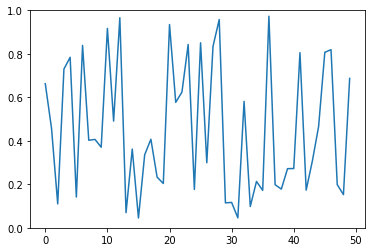

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(123456789)
y_max = 50

fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(y_max))
ax.set_ylim(0, 1)


def update(data):
    line.set_ydata(data)
    return line,


def data_gen():
    while True:
        yield np.random.rand(y_max)

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

In [ ]:
# https://github.com/mdbloice/Augmentor
# p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
# p.flip_left_right(probability=0.5)
# p.flip_top_bottom(probability=0.5)
# p.sample(100)

In [ ]:
# https://www.kaggle.com/bguberfain/elastic-transform-for-data-augmentation
# https://www.ritchieng.com/machine-learning-photo-ocr/

In [ ]:
# https://subscription.packtpub.com/book/application_development/9781785283932/1/ch01lvl1sec16/image-warping
import cv2
import numpy as np
import math

img = cv2.imread('images/input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

#####################
# Vertical wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)

#####################
# Horizontal wave

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0

cv2.imshow('Horizontal wave', img_output)

#####################
# Both horizontal and vertical 

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)

#####################
# Concave effect

img_output = np.zeros(img.shape, dtype=img.dtype)

for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Concave', img_output)

cv2.waitKey()

In [ ]:
# https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
# Mehr Code vorhanden
import cv2
import numpy as np

img1_square_corners = np.float32([[253,211], [563,211], [563,519],[253,519]])
img2_quad_corners = np.float32([[234,197], [520,169], [715,483], [81,472]])

h, mask = cv2.findHomography(img1_square_corners, img2_quad_corners)
im = cv2.imread("image1.png")
out = cv2.warpPerspective(im, h, (800,800))
cv2.imwrite("result.png", out)

In [ ]:
# https://www.programcreek.com/python/example/89422/cv2.warpPerspective
# Python cv2.warpPerspective() Examples 